# 4.10.2 Coding Etiquette & Excel Reporting

## This script includes the following points:

#### 1. Import libraries and data
#### 2. Merge the department dataframe
#### Task 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
#### Task 8. Comparison of Customer Profiles with Regions and Departments
#### Task 9. Visualizations
#### Task 10. Export Final Data Set
#### Task 11. Additional Visualizations

## 1. Import libraries and data

In [180]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [182]:
# Set the Path
path = r'/Users/test/Desktop/Data Analysis/11-2024 Instacart Basket Analysis'

In [9]:
# Import departments dataframe
dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [11]:
# Import latest dataframe
instacart = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_excluded.pkl'))

## 2. Merge the department dataframe

In [13]:
dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [15]:
# Rename index column as department_id
dept.rename(columns ={'Unnamed: 0' : 'department_id'}, inplace = True)

In [17]:
dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [20]:
# Merge instacart dataset with department dataset
instacart_final = instacart.merge(dept, on = 'department_id', how = 'left', indicator = True)

In [22]:
instacart_final.shape

(30959687, 38)

In [26]:
instacart_final.drop(columns = ['_merge'], inplace=True)

In [28]:
# Export the new merged dataframe
instacart_final.to_pickle(os.path.join(path,'02 Data','Prepared Data','instacart_final.pkl'))

In [184]:
# Import merged data
instacart = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','instacart_final.pkl'))

## Task 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [12]:
# Check the value counts for instacart
instacart['department'].value_counts()

department
produce            9079273
dairy eggs         5172305
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

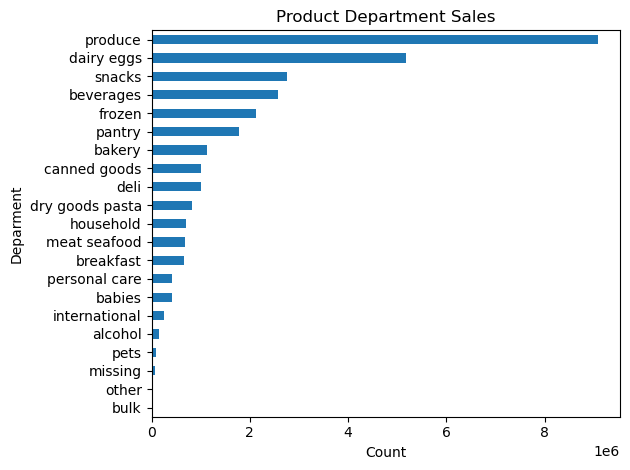

In [14]:
#Create a bar chart of departments
dept_bar = instacart['department'].value_counts().sort_values(ascending= True).plot.barh()
plt.title('Product Department Sales')
plt.xlabel('Count')
plt.ylabel('Deparment')
plt.tight_layout()

In [16]:
# Export the bar chart
dept_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_departments.png'))

In [18]:
# Check columns of instacart
instacart.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_spend', 'spending_flag', 'customer_frequency',
       'order_frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'family_status', 'income', 'region', 'activity_flag',
       'age_group', 'income_group', 'dependants_flag', 'department'],
      dtype='object')

In [36]:
# Create aggregation subset of customer profile
customer_profile = instacart.groupby(['user_id', 'region', 'family_status', 'age_group', 'order_number', 'loyalty_flag', 'dependants_flag', 'income_group', 'spending_flag', 'days_since_prior_order'])['prices'].sum().reset_index()

In [38]:
customer_profile.head()

,user_id,region,family_status,age_group,order_number,loyalty_flag,dependants_flag,income_group,spending_flag,days_since_prior_order,prices
0,1,South,married,Adult,2,New customer,has dependants,Low income,Low spender,15.0,35.4
1,1,South,married,Adult,3,New customer,has dependants,Low income,Low spender,21.0,28.2
2,1,South,married,Adult,4,New customer,has dependants,Low income,Low spender,29.0,26.0
3,1,South,married,Adult,5,New customer,has dependants,Low income,Low spender,28.0,57.0
4,1,South,married,Adult,6,New customer,has dependants,Low income,Low spender,19.0,25.0


In [40]:
# Aggregate variables for customer profiles for expenditure
customer_agg = customer_profile.groupby('user_id').agg({'order_number': ['max', 'min', 'mean'], 'prices': ['max', 'min', 'mean']})

In [42]:
customer_agg

order_number           prices                   
                 max min  mean    max    min        mean
user_id                                                 
1                 10   2   6.0   63.1   25.0   38.233333
10                 5   2   3.5  429.6  240.0  299.500000
100                5   2   3.5   97.6   28.2   60.700000
1000               7   2   4.5  134.4  112.9  122.916667
10000             72   2  37.0  298.2   11.8  121.188732
...              ...  ..   ...    ...    ...         ...
99994             11   2   6.5  174.0   86.2  128.960000
99995              5   2   3.5  132.5   42.9   88.825000
99996             12   2   7.0  127.1    2.8   78.118182
99998              5   2   3.5   51.2   20.9   42.325000
99999             34   2  18.0  159.7    6.7   70.118182

[162631 rows x 6 columns]

In [46]:
# Aggregate variables for customer profiles for usage frequency
freq_agg = customer_profile.groupby('user_id').agg({'order_number': ['max', 'min', 'mean'], 'days_since_prior_order': ['max', 'min', 'mean']})

In [48]:
freq_agg

order_number           days_since_prior_order                 
                 max min  mean                    max   min       mean
user_id                                                               
1                 10   2   6.0                   30.0   0.0  19.555556
10                 5   2   3.5                   30.0  12.0  19.750000
100                5   2   3.5                   30.0  18.0  26.000000
1000               7   2   4.5                   30.0   5.0  12.166667
10000             72   2  37.0                   17.0   0.0   4.507042
...              ...  ..   ...                    ...   ...        ...
99994             11   2   6.5                   30.0   5.0  19.200000
99995              5   2   3.5                   30.0   6.0  18.000000
99996             12   2   7.0                   30.0  15.0  22.181818
99998              5   2   3.5                   12.0   7.0   8.750000
99999             34   2  18.0                   24.0   1.0   6.969697

[162631 rows x 6 columns]

## Task 8. Comparison of Customer Profiles with Regions and Departments

### 8.1 Customer Profile by Region

#### 8.1.1 Age Group vs Regions

In [52]:
age_region_comparison = pd.crosstab(instacart['age_group'],instacart['region'],dropna = False)

In [54]:
age_region_comparison

region,Midwest,Northeast,South,West
age_group,,,,
Adult,1714945,1258119,2446628,1840635
Middle-aged adult,1734780,1297972,2381589,1895530
Older adult,2455033,1883933,3520930,2712961
Young adult,1355548,1023858,1960295,1476931


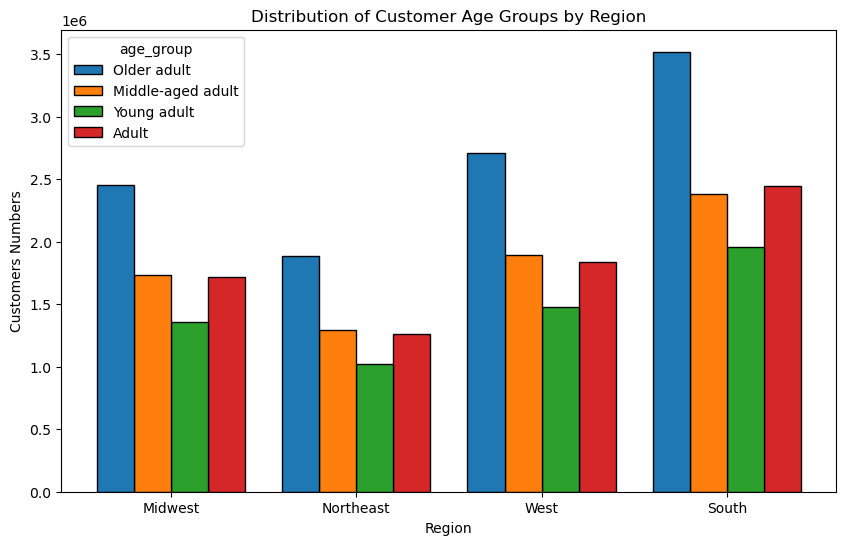

In [56]:
# Plot a Histogram for age group and region comparison
plt.figure(figsize=(10, 6))
sns.histplot(data=instacart, x='region', hue='age_group', multiple='dodge', shrink=.8, alpha=1)
plt.title('Distribution of Customer Age Groups by Region')
plt.ylabel('Customers Numbers')
plt.xlabel('Region')
# Save and show
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','hist_age_region.png'), bbox_inches = 'tight')
plt.show()

#### 8.1.2 Income groups vs Region

In [60]:
income_region_comparison = pd.crosstab(instacart['income_group'],instacart['region'],dropna = False)

In [62]:
income_region_comparison

region,Midwest,Northeast,South,West
income_group,,,,
High income,1841268,1372560,2548699,1977278
Low income,1790395,1366710,2592658,1990039
Medium income,3628643,2724612,5168085,3958740


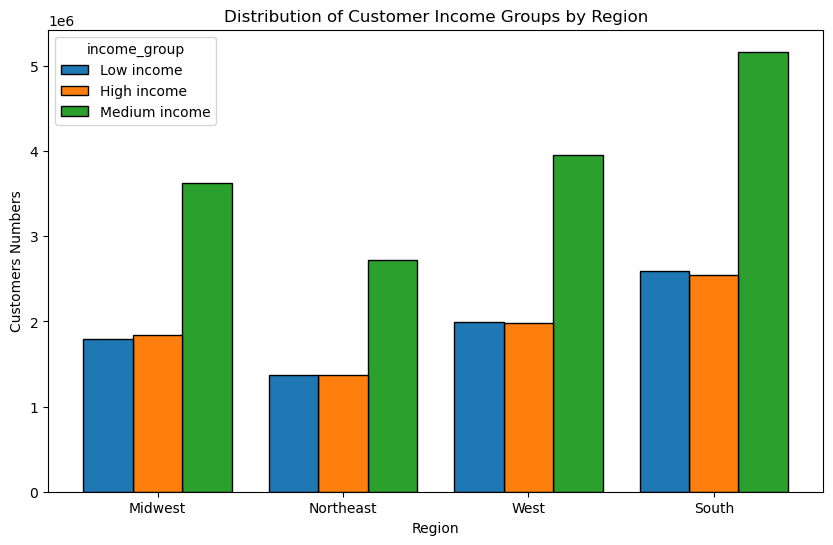

In [64]:
# Plot a Histogram for income group and region comparison
plt.figure(figsize=(10, 6))
sns.histplot(data=instacart, x='region', hue='income_group', multiple='dodge', shrink=.8, alpha=1)
plt.title('Distribution of Customer Income Groups by Region')
plt.ylabel('Customers Numbers')
plt.xlabel('Region')
# Save and show
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','hist_income_region.png'), bbox_inches = 'tight')
plt.show()

#### 8.1.3 Departments vs Regions

In [66]:
dept_region_comparison = pd.crosstab(instacart['department'],instacart['region'],dropna = False)

In [68]:
dept_region_comparison

region,Midwest,Northeast,South,West
department,,,,
alcohol,34043,25017,48813,36754
babies,95741,72712,139511,102428
bakery,261753,199300,371620,288155
beverages,598979,462929,859419,650574
breakfast,156155,117904,223172,173619
bulk,7929,5599,11180,8743
canned goods,237459,176936,337458,260221
dairy eggs,1211283,913813,1721319,1325890
deli,234464,178398,333620,257352


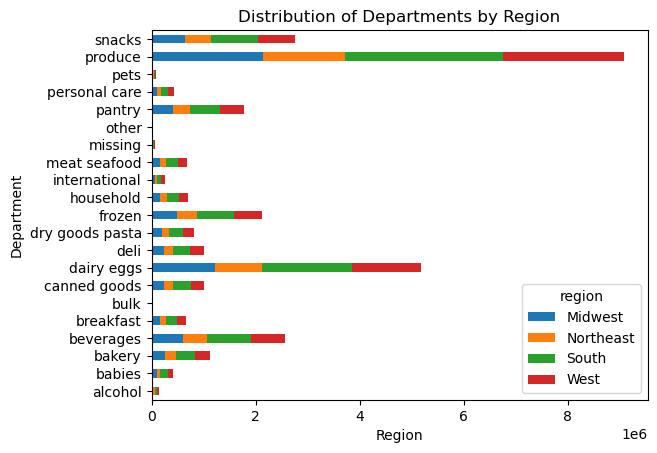

In [70]:
# Plot a stacked bar chart for department region comparison

stack_bar = dept_region_comparison.plot.barh(stacked =True)
plt.title('Distribution of Departments by Region')
plt.ylabel('Department')
plt.xlabel('Region')

# Export the bar chart
stack_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_department_region.png'))

#### 8.1.4 Dependants vs Region

In [86]:
depend_region_comp  = pd.crosstab(instacart['dependants_flag'],instacart['region'],dropna = False)

In [88]:
depend_region_comp

region,Midwest,Northeast,South,West
dependants_flag,,,,
has dependants,5437775,4109605,7727930,5945869
no dependants,1822531,1354277,2581512,1980188


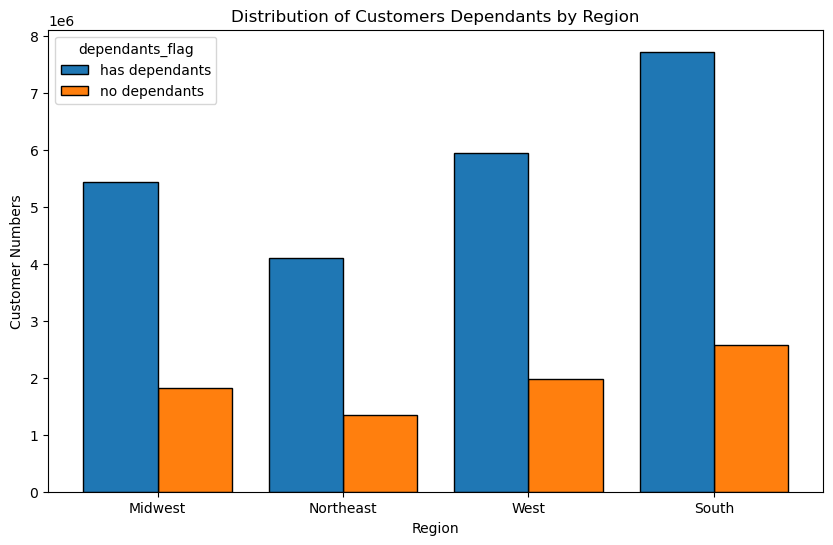

In [90]:
plt.figure(figsize=(10, 6))
# Plot a histogram bar
sns.histplot(data=instacart, x='region', hue='dependants_flag', multiple='dodge', shrink=.8, alpha=1)
plt.title('Distribution of Customers Dependants by Region')
plt.ylabel('Customer Numbers')
plt.xlabel('Region')
# Save and show
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','hist_dependants_region.png'), bbox_inches = 'tight')
plt.show()

#### 8.1.5 Family Status vs Region

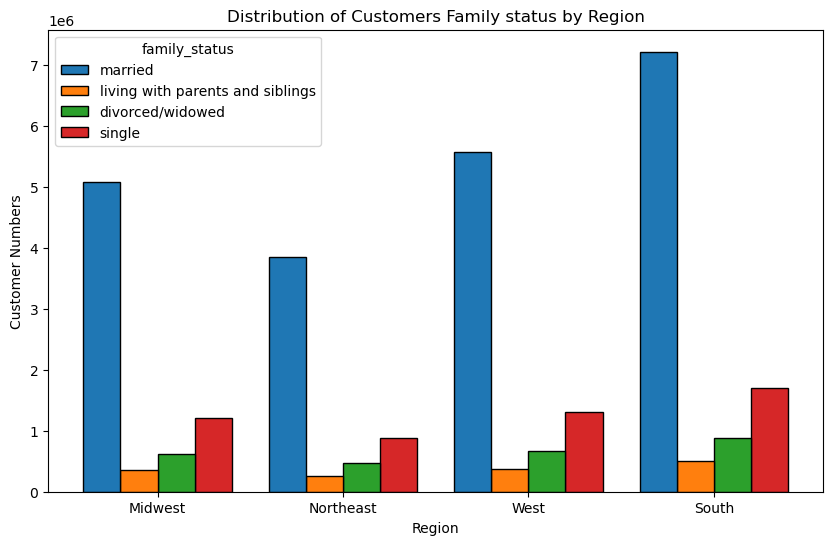

In [94]:
plt.figure(figsize=(10, 6))
# Plot a histogram bar
sns.histplot(data=instacart, x='region', hue='family_status', multiple='dodge', shrink=.8, alpha=1)
plt.title('Distribution of Customers Family status by Region')
plt.ylabel('Customer Numbers')
plt.xlabel('Region')
# Save and show
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','hist_familiy_region.png'), bbox_inches = 'tight')
plt.show()

### 8.2 Customer Profile by Department Sales

#### 8.2.1 Age group vs Department

In [99]:
age_dept_comp  = pd.crosstab(instacart['department'],instacart['age_group'],dropna = False)

In [101]:
age_dept_comp

age_group,Adult,Middle-aged adult,Older adult,Young adult
department,,,,
alcohol,33417,35676,47596,27938
babies,96520,97376,138738,77758
bakery,263669,264355,382446,210358
beverages,595539,615038,883669,477655
breakfast,156165,158819,227751,128115
bulk,7794,7819,11424,6414
canned goods,236621,238836,344447,192170
dairy eggs,1219303,1216830,1760865,975307
deli,235992,235974,343335,188533


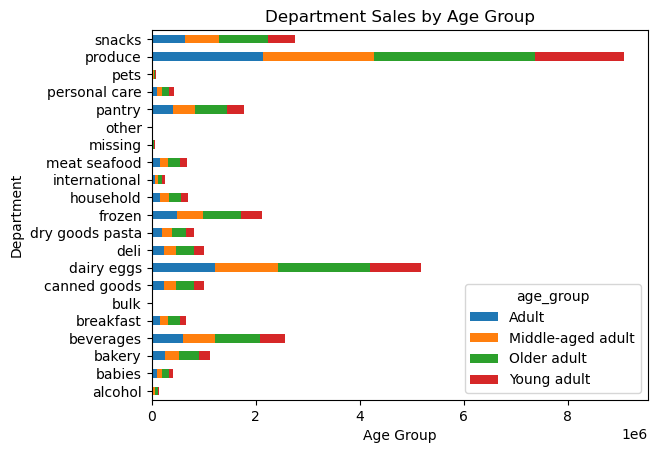

In [103]:
# Plot a stacked bar chart

stack_bar = age_dept_comp.plot.barh(stacked =True)
plt.title('Department Sales by Age Group')
plt.ylabel('Department')
plt.xlabel('Age Group')

# Export the bar chart
stack_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_age_department.png'))

#### 8.2.2 Income group vs Department

In [107]:
income_dept_comp  = pd.crosstab(instacart['department'],instacart['income_group'],dropna = False)

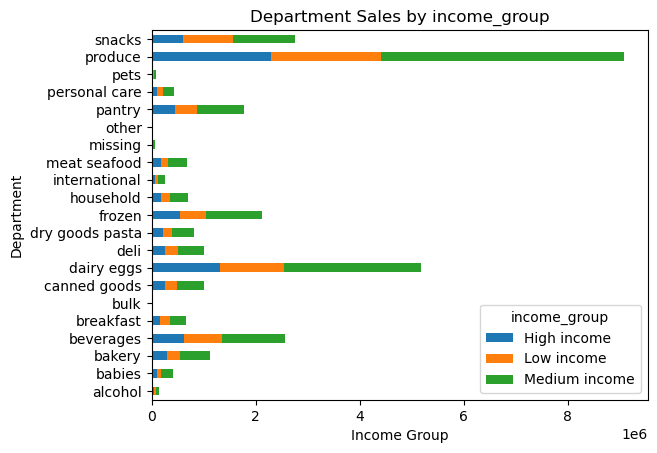

In [109]:
# Create a stacked bar chart

stack_bar = income_dept_comp.plot.barh(stacked =True)
plt.title('Department Sales by income_group')
plt.ylabel('Department')
plt.xlabel('Income Group')

# Exporting bar chart
stack_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'bar_income_department.png'))

In [111]:
# Group by income_group and department, count occurrences, and sort
income_department_counts = instacart.groupby(['income_group', 'department']).size().reset_index(name='counts')

In [113]:
income_department_counts.sort_values(by=['income_group', 'counts'], ascending=False, inplace=True)

In [117]:
income_department_counts.head(50)

,income_group,department,counts
61,Medium income,produce,4664312
49,Medium income,dairy eggs,2633064
45,Medium income,beverages,1210082
62,Medium income,snacks,1205081
52,Medium income,frozen,1069499
58,Medium income,pantry,907537
44,Medium income,bakery,565625
48,Medium income,canned goods,523693
50,Medium income,deli,504627
51,Medium income,dry goods pasta,429236


The top 5 departments across all income groups （Low, Medium, and High income) are Produce, Dairy & Eggs, Snacks, Beverages, and Frozen.

### 8.3 Customer Profiles by Order Frequency

#### 8.3.1 Age Group vs Order Frequency

In [136]:
# Create crosstab for age_group and order_frequency_flag

age_freq = pd.crosstab(instacart['age_group'], instacart['order_frequency_flag'], dropna = False)
age_freq

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
age_group,,,
Adult,4968912,666710,1624705
Middle-aged adult,4988089,697664,1624118
Older adult,7251051,990386,2331420
Young adult,3993300,539642,1283690


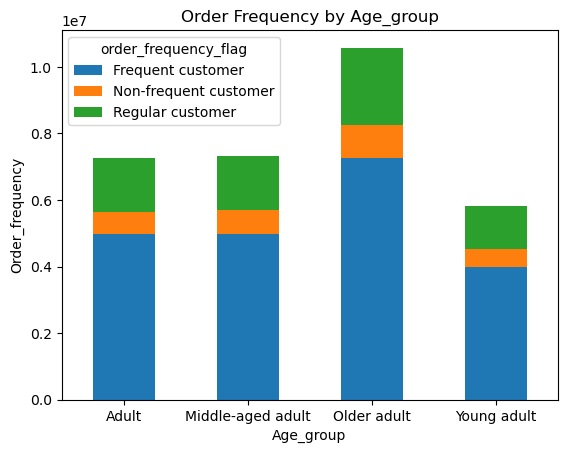

In [143]:
# Age Group and Order frequency Histogram Chart

bar3 = age_freq.plot(kind='bar', stacked =True)
plt.title('Order Frequency by Age_group')
plt.ylabel('Order_frequency')
plt.xlabel('Age_group')
plt.xticks(rotation=0)

# Exporting bar chart
bar3.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','hist_age_freq.png'))

#### 8.3.2 Family Status vs Order Frequency 

In [141]:
# Create crosstab for family status and order frequency

fam_freq = pd.crosstab(instacart['family_status'], instacart['order_frequency_flag'], dropna = False)
fam_freq

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
family_status,,,
divorced/widowed,1818733,243891,582207
living with parents and siblings,1030478,138624,311877
married,14886471,2039399,4814330
single,3465670,472488,1155519


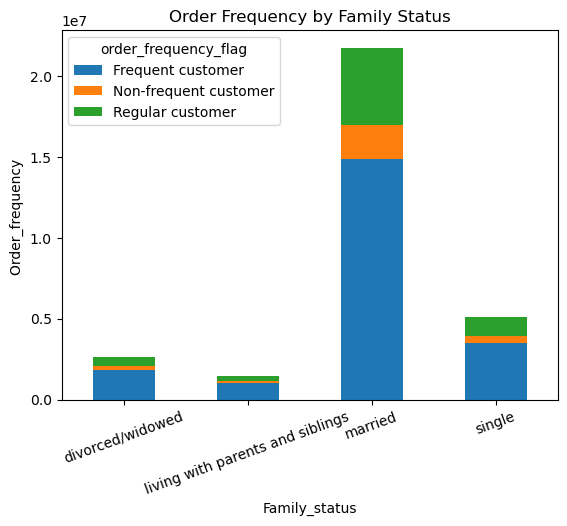

In [151]:
# Family status and order frequency Histogram Chart

bar4 = fam_freq.plot(kind='bar', stacked =True)
plt.title('Order Frequency by Family Status')
plt.ylabel('Order_frequency ')
plt.xlabel('Family_status')
plt.xticks(rotation=20)

# Exporting bar chart
bar4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','hist_fam_freq.png'))

## Task 9. Visualizations

All the visualizations are exported throughout the script.

## Task 10. Export Final Data Set

In [157]:
instacart.to_pickle(os.path.join(path,'02 Data','Prepared Data', 'instacart_final.pkl'))

## Task 11. Additional Visualizations

### 11.1 Busiest day of the week

Text(0.5, 0, '')

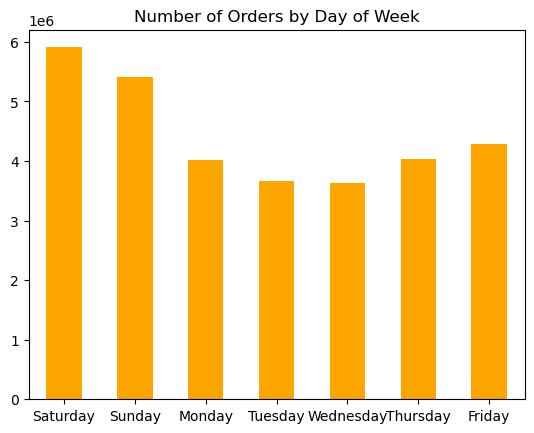

In [163]:
# Create a bar chart for orders by day of week
bar5 = instacart['orders_day_of_week'].value_counts().sort_index().plot.bar(color = 'orange')
bar5.set_title('Number of Orders by Day of Week')
bar5.set_xticklabels(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], rotation=0)
bar5.set_xlabel("")

In [165]:
# Export bar chart
bar5.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_weekday.png'))

### 11.2 Busiest hour of the day

Text(0.5, 0, 'Hour of Day (24 hr clock)')

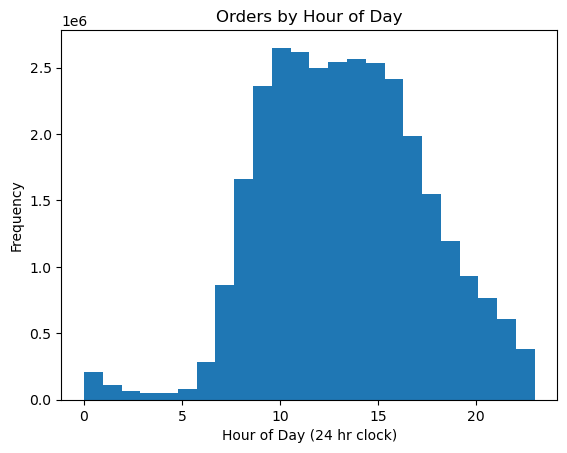

In [170]:
# Create histogram of hours of the day
hist=instacart['order_hour_of_day'].plot.hist(bins = 24)
plt.title('Orders by Hour of Day')
plt.xlabel('Hour of Day (24 hr clock)')

In [172]:
# Export histogram
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_hour.png'))

### 11.3 Age Group vs Income Group

In [175]:
#Compare Age Group and Income Group
age_income_comp = pd.crosstab (instacart['age_group'], instacart['income_group'],dropna = False)
age_income_comp

income_group,High income,Low income,Medium income
age_group,,,
Adult,817392,2728615,3714320
Middle-aged adult,2795578,968797,3545496
Older adult,4059584,1359066,5154207
Young adult,67251,2683324,3066057


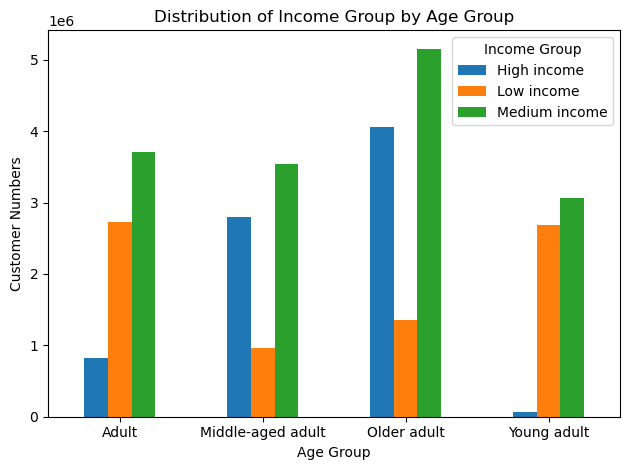

In [177]:
# Plot the  bar chart
age_income_comp.plot(kind='bar', stacked=False)
plt.title('Distribution of Income Group by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Customer Numbers')
plt.xticks(rotation=0)
plt.legend(title='Income Group')
plt.tight_layout()
age_income_comp = plt.gcf()
age_income_comp.savefig(os.path.join(path,'04 Analysis','Visualizations','hist_age_income.png'), dpi=300, bbox_inches='tight')

### 11.4 Distribution of users according to brand loyalty

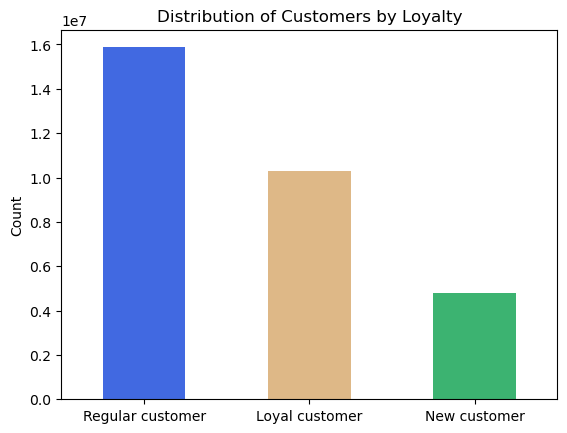

In [190]:
# Create bar chart on 'loyalty_flag' frequency

# Plot chart
bar_loyalty = instacart['loyalty_flag'].value_counts().plot.bar(color = ['royalblue', 'burlywood','mediumseagreen'])
plt.title('Distribution of Customers by Loyalty')
plt.ylabel('Count')
plt.xlabel('')
plt.xticks(rotation=0)
bar_loyalty = plt.gcf()
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','bar_loyalty.png'), bbox_inches = 'tight')

### 11.5 Total Product Orders by Region

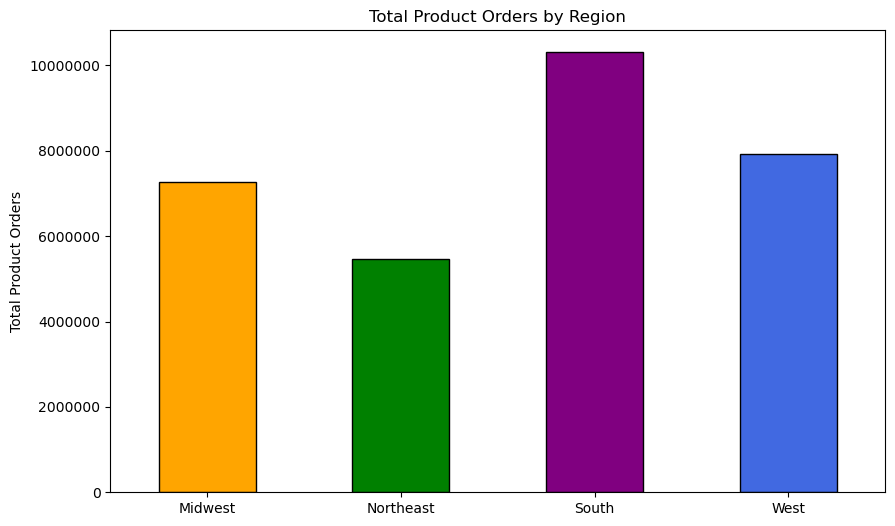

In [193]:
# Set up formatting
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain')

# Plot bars
instacart['region'].value_counts().sort_index().plot.bar(color = ['orange', 'green', 'purple', 'royalblue'],
                                                         edgecolor='black', 
                                                         zorder=2, 
                                                         alpha = 1)
plt.title("Total Product Orders by Region")
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("Total Product Orders")
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','bar_orders_region.png'), bbox_inches = 'tight')

### 11.6 Loyalty by Family Status

In [197]:
# Crosstab loyalty with family status
loyalty_fam_cross = pd.crosstab(instacart['loyalty_flag'], instacart['family_status'], dropna = False)
loyalty_fam_cross

family_status,divorced/widowed,living with parents and siblings,married,single
loyalty_flag,,,,
Loyal customer,882617,492679,7201553,1705914
New customer,403689,221743,3380032,797332
Regular customer,1358525,766557,11158615,2590431


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

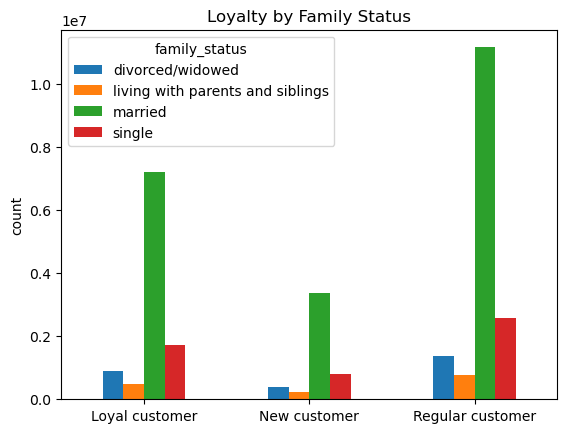

In [199]:
# Create bar chart
loyalty_fam_bar = loyalty_fam_cross.plot.bar()
plt.title('Loyalty by Family Status')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [201]:
# Export the chart
loyalty_fam_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_fam.png'))

### 11.7 Loyalty by dependants

In [206]:
# Crosstab loyalty with dependants
loyalty_depend_cross = pd.crosstab(instacart['loyalty_flag'], instacart['dependants_flag'], dropna = False)
loyalty_depend_cross

dependants_flag,has dependants,no dependants
loyalty_flag,,
Loyal customer,7694232,2588531
New customer,3601775,1201021
Regular customer,11925172,3948956


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

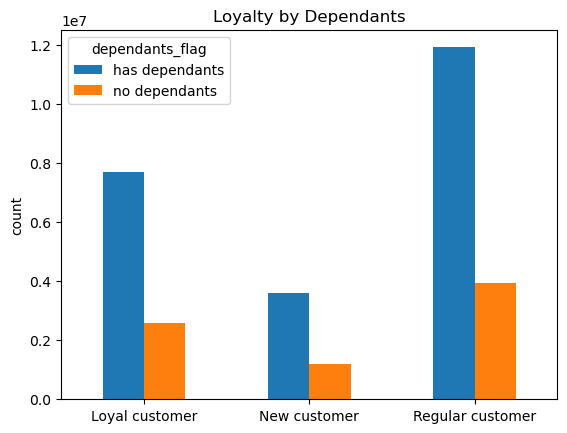

In [208]:
# bar chart
loyalty_depend_bar = loyalty_depend_cross.plot.bar()
plt.title('Loyalty by Dependants')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [210]:
# Export the chart
loyalty_depend_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_depend.png'))